In [1]:
1. Introduction to Pandas
- Explain the two primary data structures in Pandas: “Series” and “DataFrame”.
 - Discuss the advantages of Pandas compared to other libraries for handling
structured data.

import pandas as pd

# Creating a Pandas Series
data = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print(data)


a    10
b    20
c    30
d    40
dtype: int64


Two Primary Data Structures in Pandas

a. Series:

A one-dimensional labeled array that can hold any data type (integers, strings, floats, etc.).
Similar to a column in an Excel sheet or a list in Python but with an index.


In [3]:
# Creating a DataFrame
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                   'Age': [25, 30, 35],
                   'Salary': [50000, 60000, 70000]})
print(df)


      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


b. DataFrame:

A two-dimensional labeled data structure (like an Excel table or SQL table).
It consists of multiple Series (columns) and can store data of different types.

c. Advantages of Pandas Compared to Other Libraries

- Easy Data Handling: Provides efficient ways to manipulate structured data.
- Flexibility: Handles different types of data (numerical, textual, time series).
- Built-in Functions: Supports filtering, sorting, aggregation, merging, and reshaping.
- Integration: Works well with NumPy, Matplotlib, and SQL databases.
- Faster Processing: Uses optimized C-based operations for speed.

In [6]:
#2. Understanding Pandas and Its Importance - Demonstrate how to import Pandas and explain its basic functionality.
# - Load the Titanic dataset into a Pandas DataFrame.

import pandas as pd
#It allows data loading, cleaning, manipulation, and analysis.
#Supports data filtering, grouping, reshaping, and exporting to different formats (CSV, Excel, JSON, etc.).

In [7]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic_data.csv")

# Display the first 5 rows
print(df.head())


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [8]:
#3. Series and DataFrames - Create a Pandas “Series” by extracting a column from the Titanic dataset.
# - Perform basic operations on the “Series”, such as checking for missing values and calculating summary statistics 
#like the mean and median.
# - Explore the first few rows of the DataFrame, determine its shape, and view summary statistics for the Titanic dataset.

import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic_data.csv")

# Extract a column as a Pandas Series
age_series = df["age"]
print("Age Series:\n", age_series.head())  # Display first few rows

# Check for missing values
missing_values = age_series.isnull().sum()
print("\nMissing values in 'age':", missing_values)

# Calculate summary statistics
mean_age = age_series.mean()
median_age = age_series.median()
print("\nMean Age:", mean_age)
print("Median Age:", median_age)

# Explore the DataFrame
print("\nFirst few rows:\n", df.head())  # View first few rows
print("\nShape of DataFrame:", df.shape)  # Get number of rows and columns
print("\nSummary statistics:\n", df.describe())  # Get statistical summary


Age Series:
 0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

Missing values in 'age': 263

Mean Age: 29.8811345124283
Median Age: 28.0

First few rows:
    pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1 

In [9]:
# Add a new column 'FamilySize' (sum of 'sibsp' and 'parch')
df["FamilySize"] = df["sibsp"] + df["parch"]

# Create a categorical column 'AgeGroup' by binning 'age'
bins = [0, 12, 18, 40, 60, 100]
labels = ["Child", "Teenager", "Adult", "Middle-aged", "Senior"]
df["AgeGroup"] = pd.cut(df["age"], bins=bins, labels=labels)

# Identify missing values and decide whether to fill or drop them
print("\nMissing values:\n", df.isnull().sum())

# Fill missing ages with the median age
df["age"].fillna(df["age"].median(), inplace=True)

# Drop rows where 'embarked' is missing
df.dropna(subset=["embarked"], inplace=True)

# Filter dataset for passengers who survived and were in 1st class
survived_first_class = df[(df["survived"] == 1) & (df["pclass"] == 1)]
print("\nSurvived in 1st class:\n", survived_first_class.head())

# Sort passengers by age in descending order
df_sorted = df.sort_values(by="age", ascending=False)
print("\nPassengers sorted by age:\n", df_sorted.head())



Missing values:
 pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
FamilySize       0
AgeGroup       263
dtype: int64

Survived in 1st class:
    pclass  survived                                           name     sex  \
0       1         1                  Allen, Miss. Elisabeth Walton  female   
1       1         1                 Allison, Master. Hudson Trevor    male   
5       1         1                            Anderson, Mr. Harry    male   
6       1         1              Andrews, Miss. Kornelia Theodosia  female   
8       1         1  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
0  29.0000      0      0   24160  211.3375       B5        S    2   NaN   
1   0.9167      1    

In [10]:
#5. Data Aggregation and Grouping - Group data by specific categories (e.g., passenger class) and perform aggregation
#functions such as calculating the average fare and the survival rate for each group.

import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("titanic_data.csv")

# Group by passenger class and calculate the average fare
avg_fare_by_class = df.groupby("pclass")["fare"].mean()
print("\nAverage Fare by Passenger Class:\n", avg_fare_by_class)

# Group by passenger class and calculate survival rate
survival_rate_by_class = df.groupby("pclass")["survived"].mean()
print("\nSurvival Rate by Passenger Class:\n", survival_rate_by_class)



Average Fare by Passenger Class:
 pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

Survival Rate by Passenger Class:
 pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


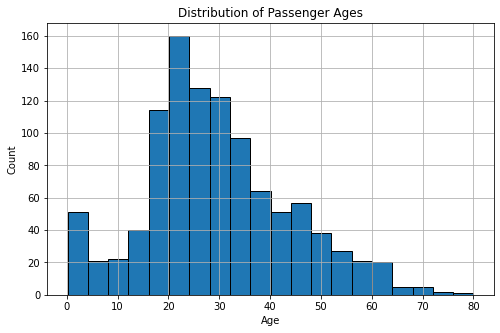

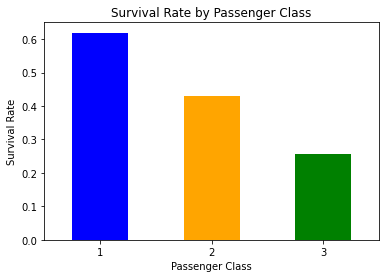

In [11]:
#6. Data Visualization with Pandas - Use Pandas' built-in plotting functions to create basic visualizations.
#- Visualize the distribution of ages in the dataset or the survival rate across different passenger classes.
 
import matplotlib.pyplot as plt

# Histogram: Distribution of Ages
plt.figure(figsize=(8, 5))
df["age"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Bar chart: Survival rate across different passenger classes
survival_rate_by_class.plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()


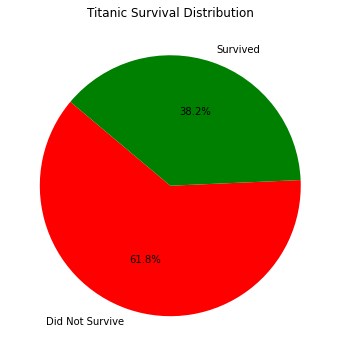

In [12]:
# Pie chart: Survival distribution
survival_counts = df["survived"].value_counts()
labels = ["Did Not Survive", "Survived"]

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct="%1.1f%%", colors=["red", "green"], startangle=140)
plt.title("Titanic Survival Distribution")
plt.show()
